## Analysis based on 'time of year' and 'weather' data


#### Importing all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from datetime import date
import holidays


### Fetching all the data needed for this objective


For Windows

In [2]:
job =  pd.read_excel(r'.\UPDATED DATA\04. Repairs\Job.xlsx')
pty_codes = pd.read_excel(r'.\UPDATED DATA\04. Repairs\Pty.xlsx')
sor = pd.read_excel(r'.\UPDATED DATA\04. Repairs\SORTrd.xlsx')
# Weather data in Gloucester from 27 Feb 1996 to 15 June 2023
gl = pd.read_excel(r'.\UPDATED DATA\Weather Data\Gloucester.xlsx')
# Weather codes from WMO - for states of sky - CLOUDY, CLEAR, RAIN, LIGHT DRIZZLE, SNOW etc
wmo = pd.read_csv(r'.\UPDATED DATA\wmo_codes.csv', header = None)

For Mac

In [ ]:
# job =  pd.read_excel(r'./UPDATED DATA/04. Repairs/Job.xlsx')
# pty_codes = pd.read_excel(r'./UPDATED DATA/04. Repairs/Pty.xlsx')
# sor = pd.read_excel(r'./UPDATED DATA/04. Repairs/SORTrd.xlsx')
# # Weather data in Gloucester from 27 Feb 1996 to 15 June 2023
# gl = pd.read_excel(r'./UPDATED DATA/Weather Data/Gloucester.xlsx')
# # Weather codes from WMO - for states of sky - CLOUDY, CLEAR, RAIN, LIGHT DRIZZLE, SNOW etc
# wmo = pd.read_csv(r'./UPDATED DATA/wmo_codes.csv', header = None)

### Preparing data

In [3]:
job['job_report_date'] = pd.to_datetime(job['reported-dat']).dt.date
job = job.merge(pty_codes, how='left', left_on='pty-cde', right_on='pty_cde')
job = job.drop('pty_cde', axis = 1)

# getting all UK holidays from holidays library
uk_holidays = holidays.UnitedKingdom()

Replace obsolete trade codes (no longer in use by GCH)

In [4]:
# Replacing OLD SOR trade codes with NEW ones
job['sortrd-cde-1'].replace(['BR', 'C', 'E', 'E1', 'F', 'G','GF', 'H', 'MI', 'P', 'PD', 'PO','R', 'SC', 'TI', 'W'], 
                             ['0B','0C','0E', '0E', '0F','0Z','0G','HP','NS','0P', '0D','0D','0R', '0S', '0I','0C'], 
                             inplace=True)
# mapping trade codes with trade names
sor = sor.set_index('cde')
sor_map = sor.to_dict()['dsc']
job['sor'] = job['sortrd-cde-1'].map(sor_map)

Adding 'time of year' features to job (repair) dataset

In [5]:
job['Year'] = pd.to_datetime(job['job_report_date']).dt.year
job['Week'] = pd.to_datetime(job['job_report_date']).dt.week
job['Month'] = pd.to_datetime(job['job_report_date']).dt.month
job['Day'] = pd.to_datetime(job['job_report_date']).dt.day

job['WeekDay'] = pd.to_datetime(job['job_report_date']).dt.dayofweek
job['Holiday'] = job['job_report_date'].isin(uk_holidays)
job['Weekend']=job.WeekDay.isin([5,6]).astype(int)

job2 = job.copy()

C:\Users\adeel\AppData\Local\Temp\ipykernel_8240\1844611347.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  job['Week'] = pd.to_datetime(job['job_report_date']).dt.week


# Analysis 

### Repairs for every priority type

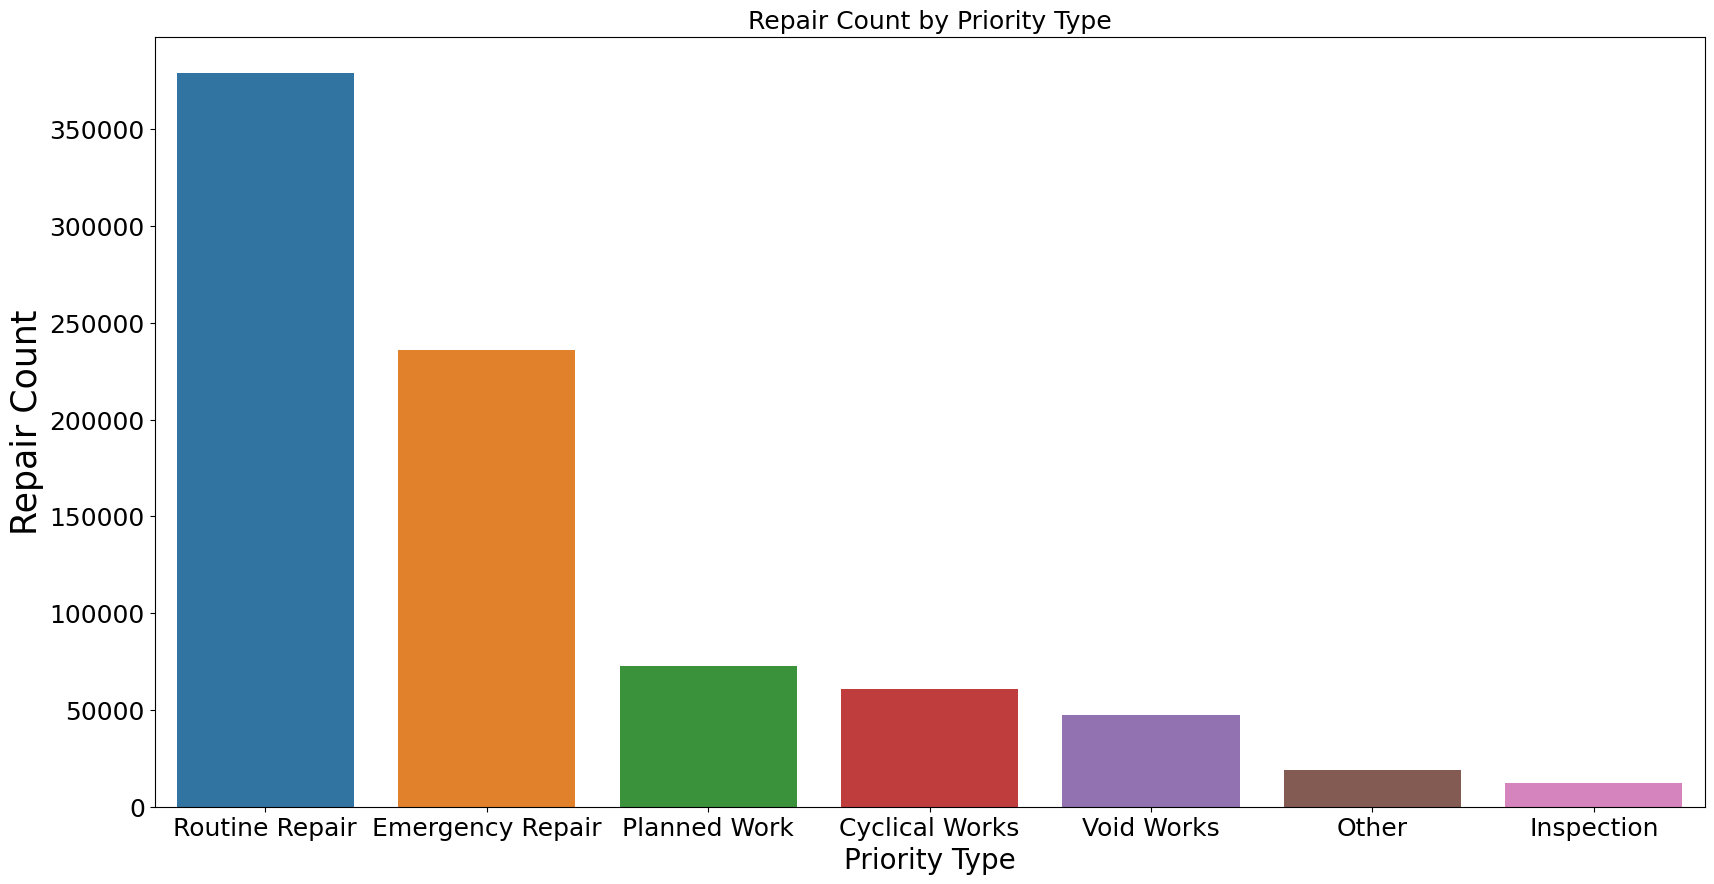

In [6]:
plt.figure(figsize = (20,10))
ax = sns.countplot(x='pty_classification', order = job2['pty_classification'].value_counts().index, data=job2)
plt.title('Repair Count by Priority Type', fontsize = 18)
ax.tick_params(axis='x', labelsize=18)  
ax.tick_params(axis='y', labelsize=18) 
ax.set_xlabel('Priority Type', fontsize=20)
ax.set_ylabel('Repair Count', fontsize=25)
plt.show()

### Repair counts for every trade type

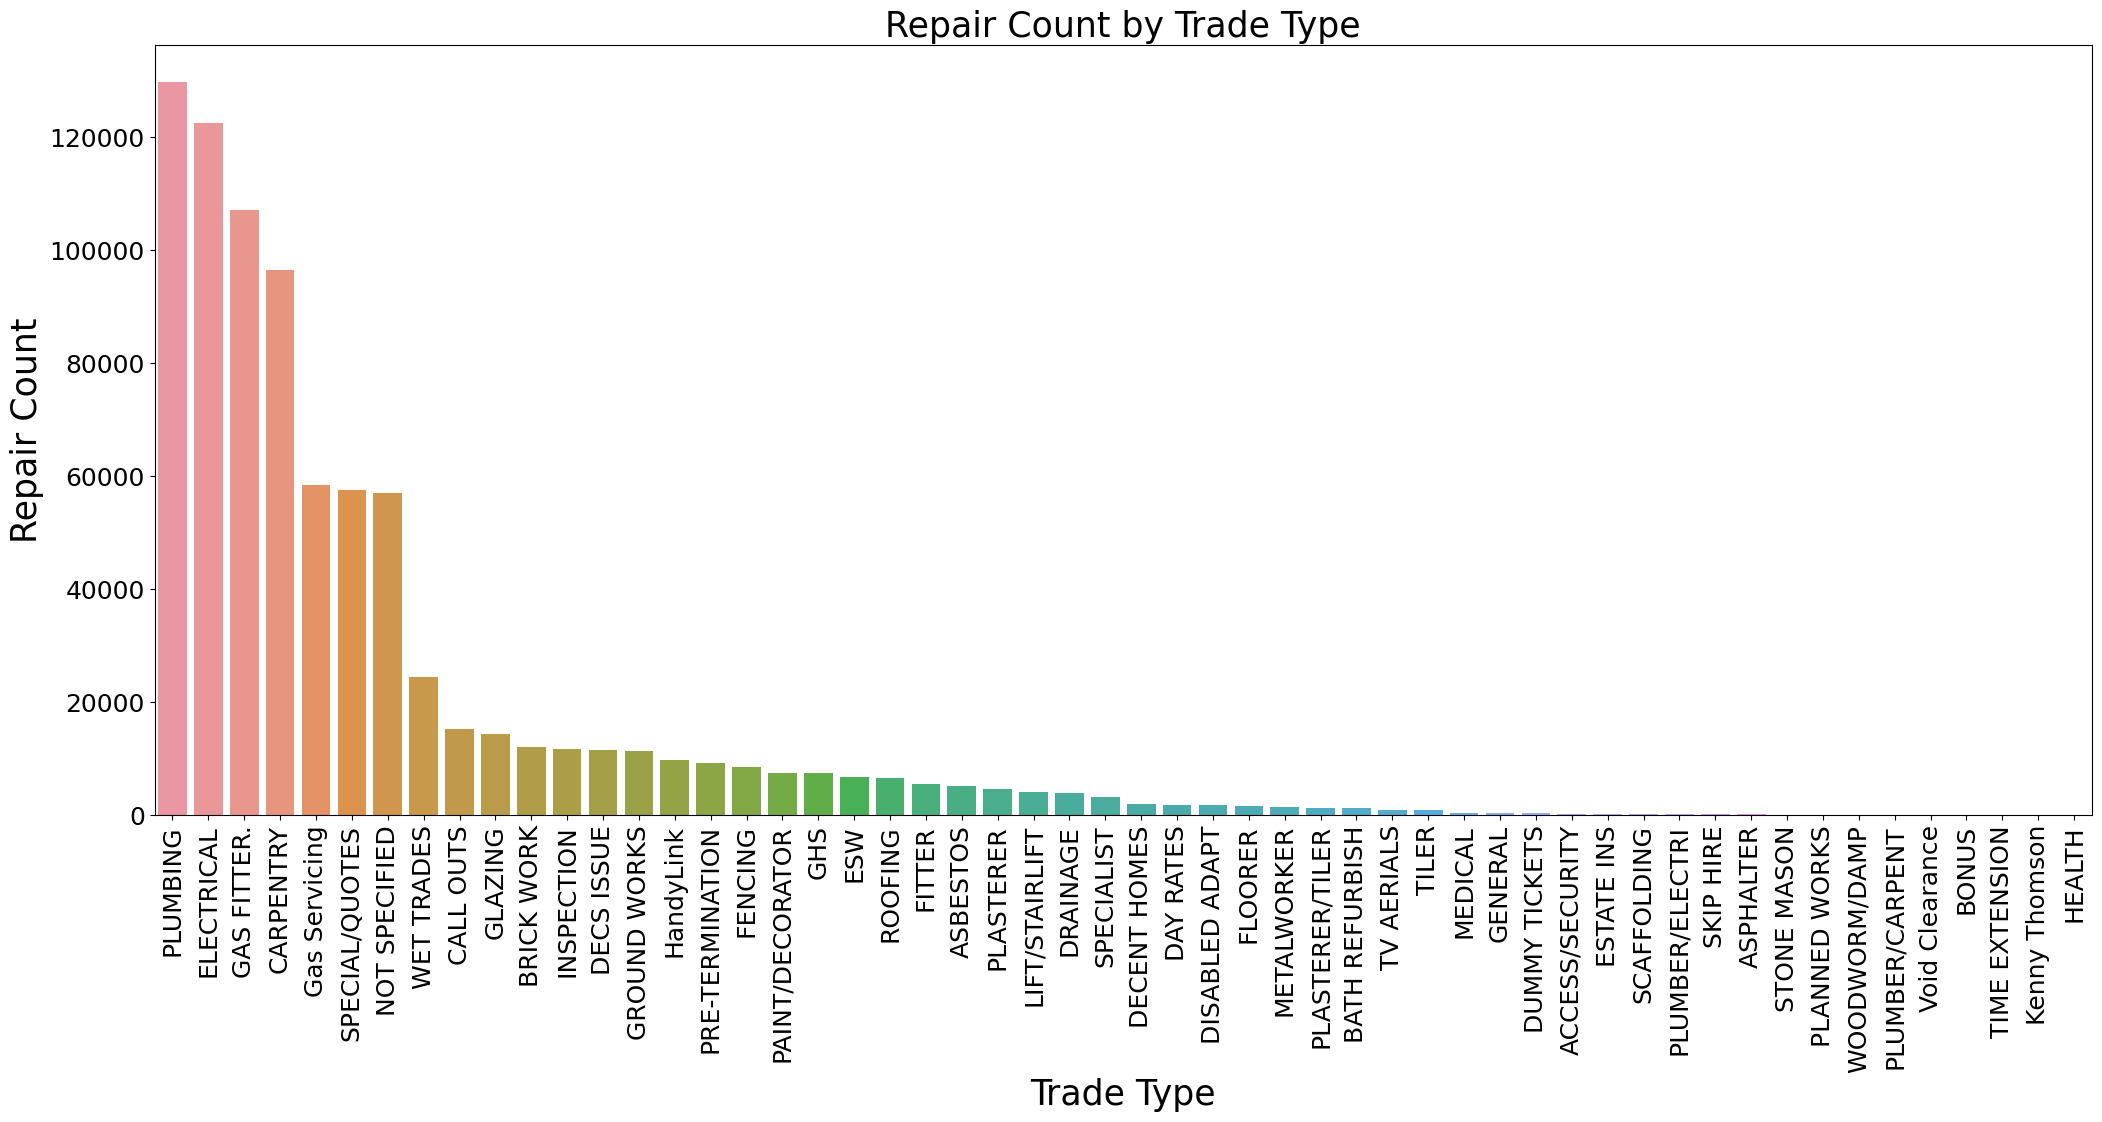

In [7]:
plt.figure(figsize = (25,10))
ax = sns.countplot(x='sor', order = job2['sor'].value_counts().index, data=job2)
plt.title('Repair Count by Trade Type', fontsize = 25)
ax.tick_params(axis='x', labelsize=18)  
ax.tick_params(axis='y', labelsize=18) 
ax.set_xlabel('Trade Type', fontsize=25)
ax.set_ylabel('Repair Count', fontsize=25)
plt.xticks(rotation = 90)
plt.show()

### Repairs for every year

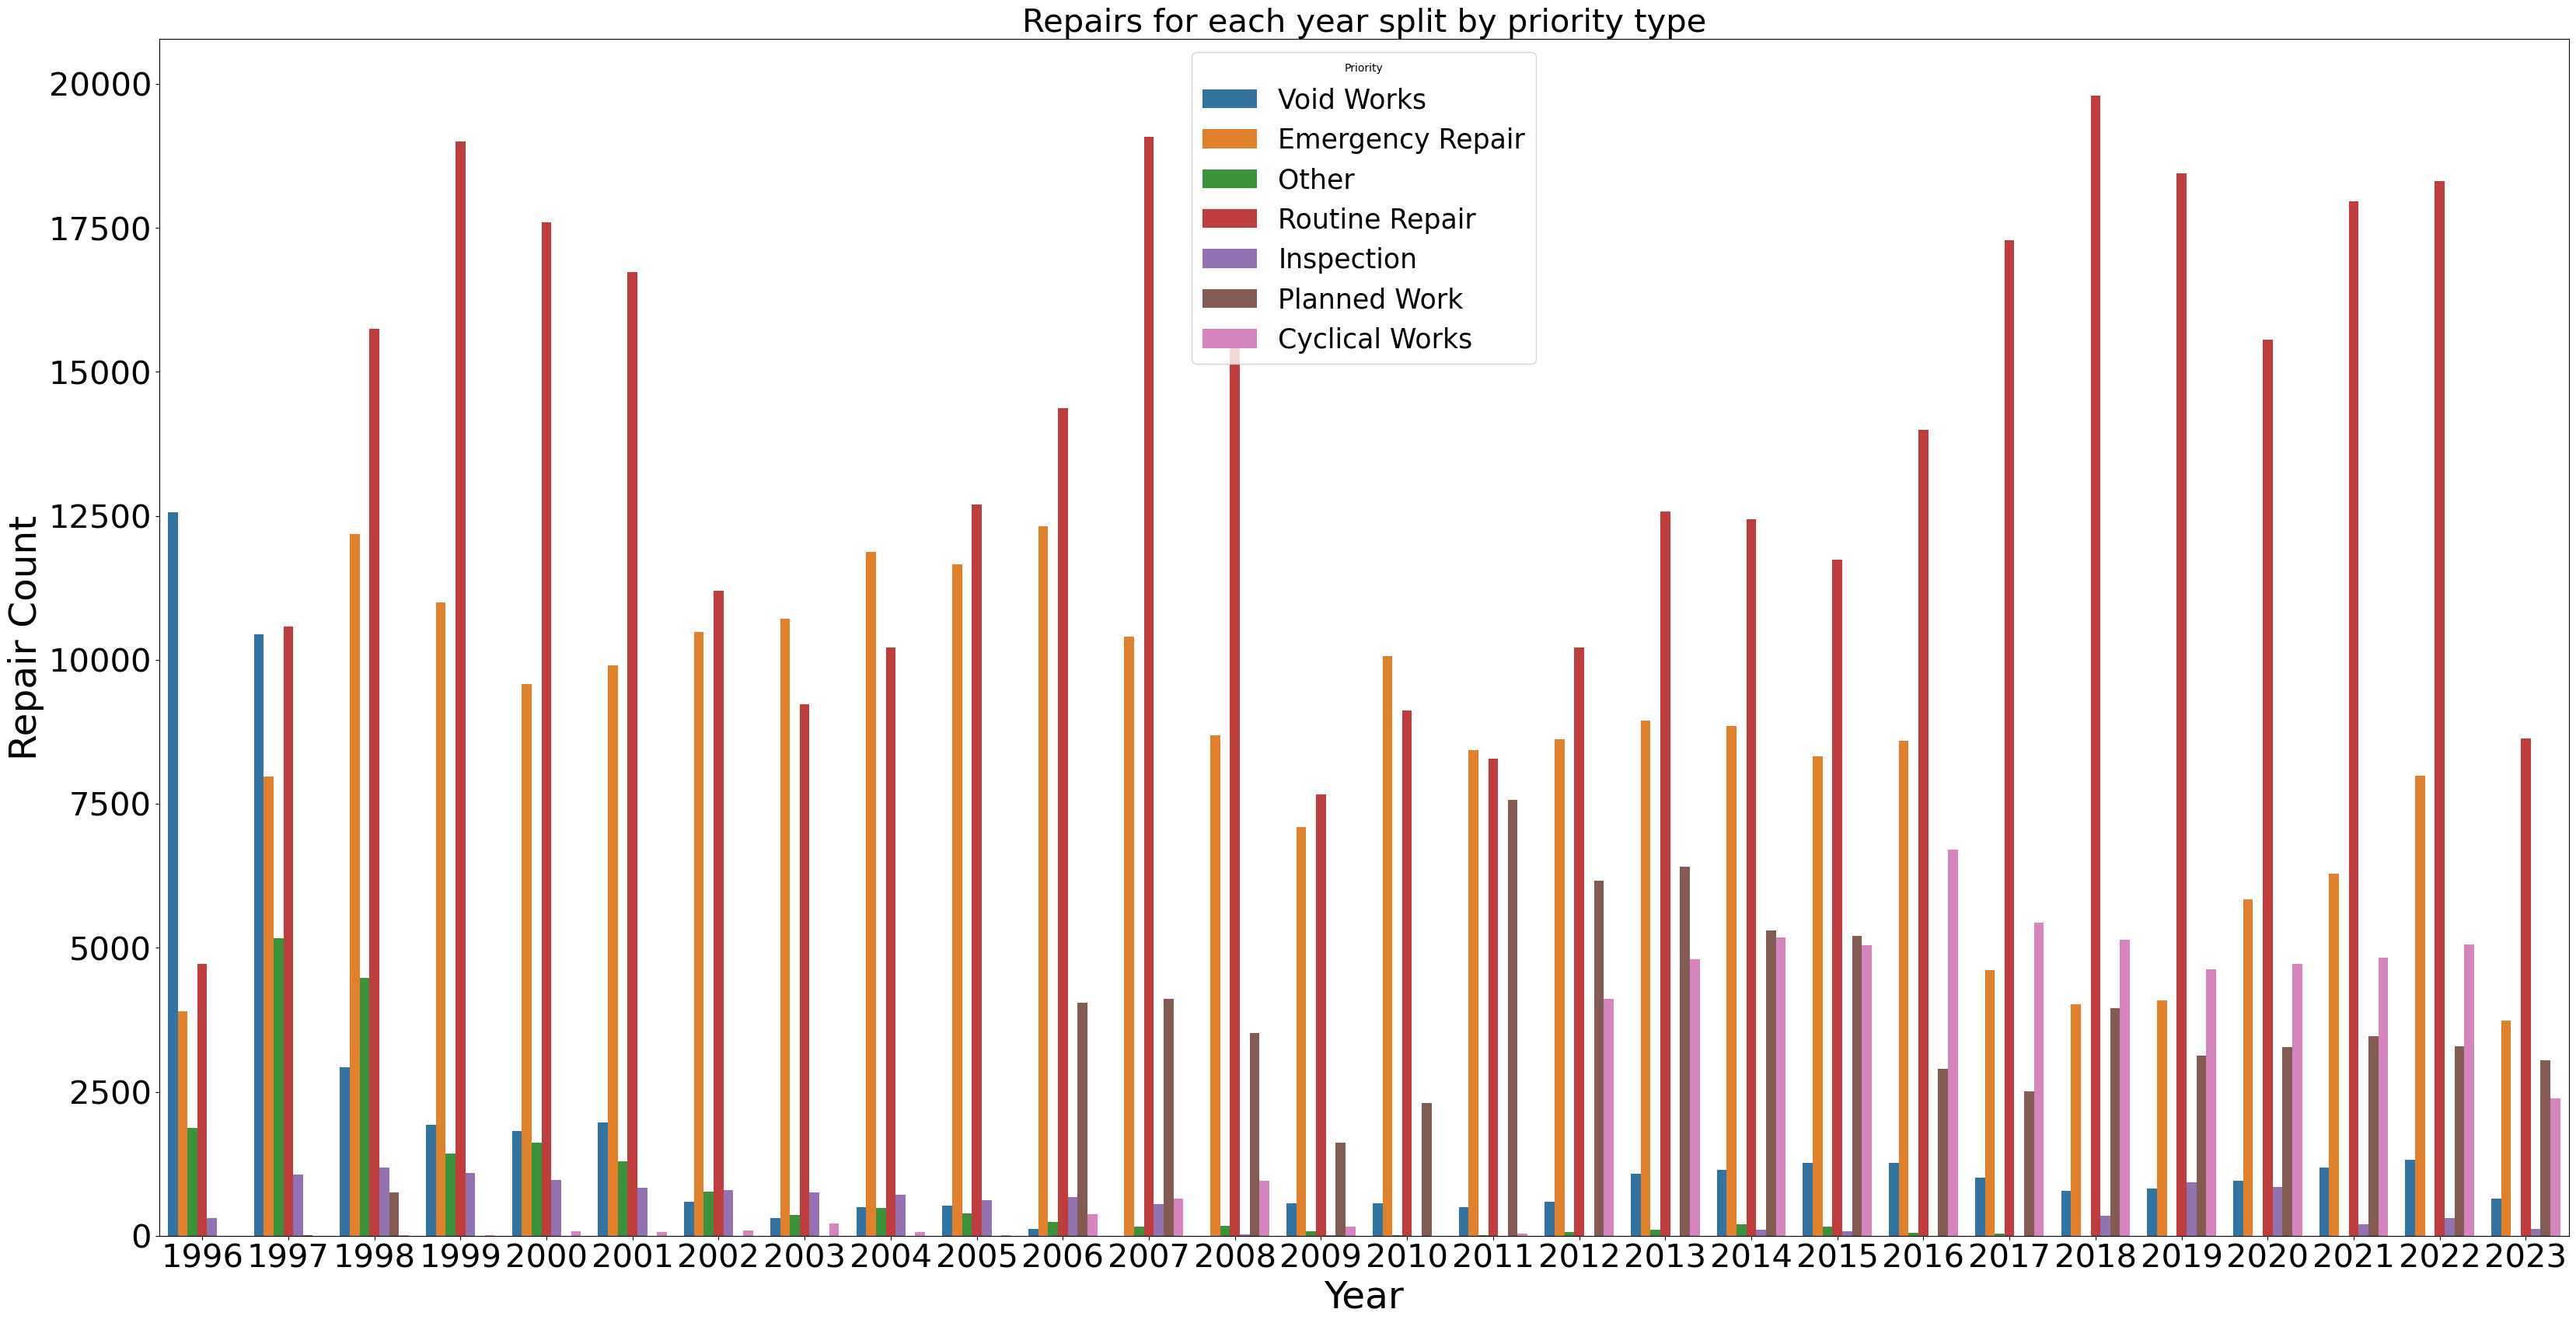

In [8]:
plt.figure(figsize = (40,20))
ax = sns.countplot(x='Year', data=job2[job2['Year']!=1900], hue = 'pty_classification')
plt.title('Repairs for each year split by priority type', fontsize = 30)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30) 
ax.set_xlabel('Year', fontsize=35)
ax.set_ylabel('Repair Count', fontsize=35)
plt.grid(False)
plt.legend(loc = 'best', title = 'Priority', fontsize = 25)
plt.show()

### Repairs for every month

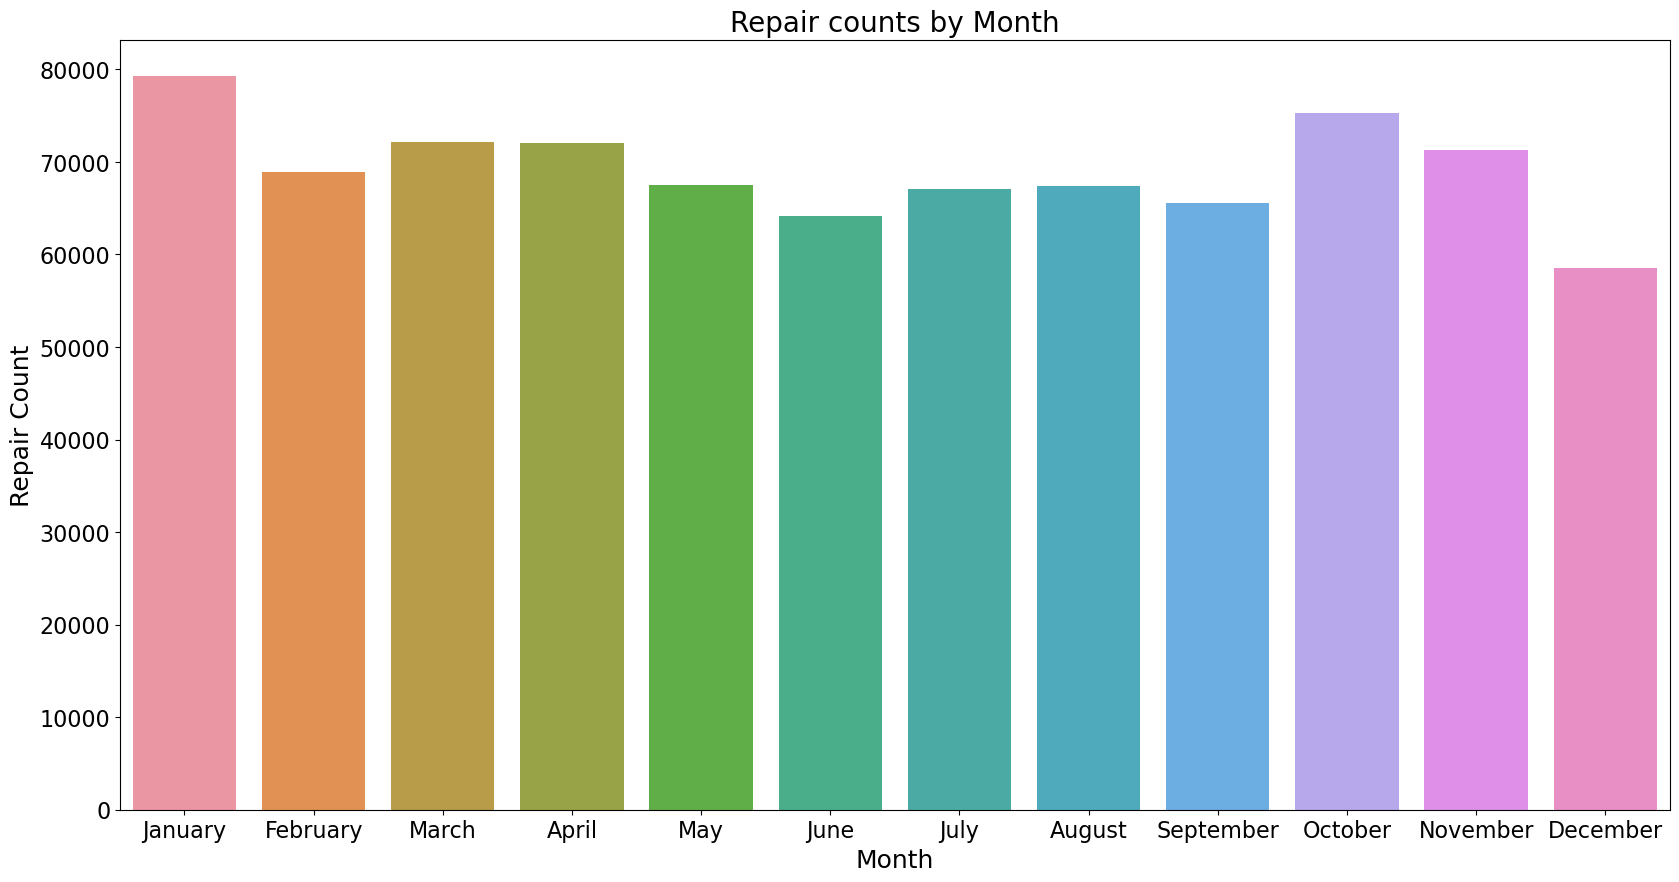

In [9]:
month_map_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}


plt.figure(figsize = (20,10))
ax = sns.countplot(x='Month', data=job2)

# x-axis labels using month mapping dictionary
ax.set_xticklabels([month_map_dict[x] for x in range(1,13)])

plt.title('Repair counts by Month', fontsize = 20)
ax.tick_params(axis='x', labelsize=16)  
ax.tick_params(axis='y', labelsize=16) 
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Repair Count', fontsize=18)
plt.show()

### Repairs for every week

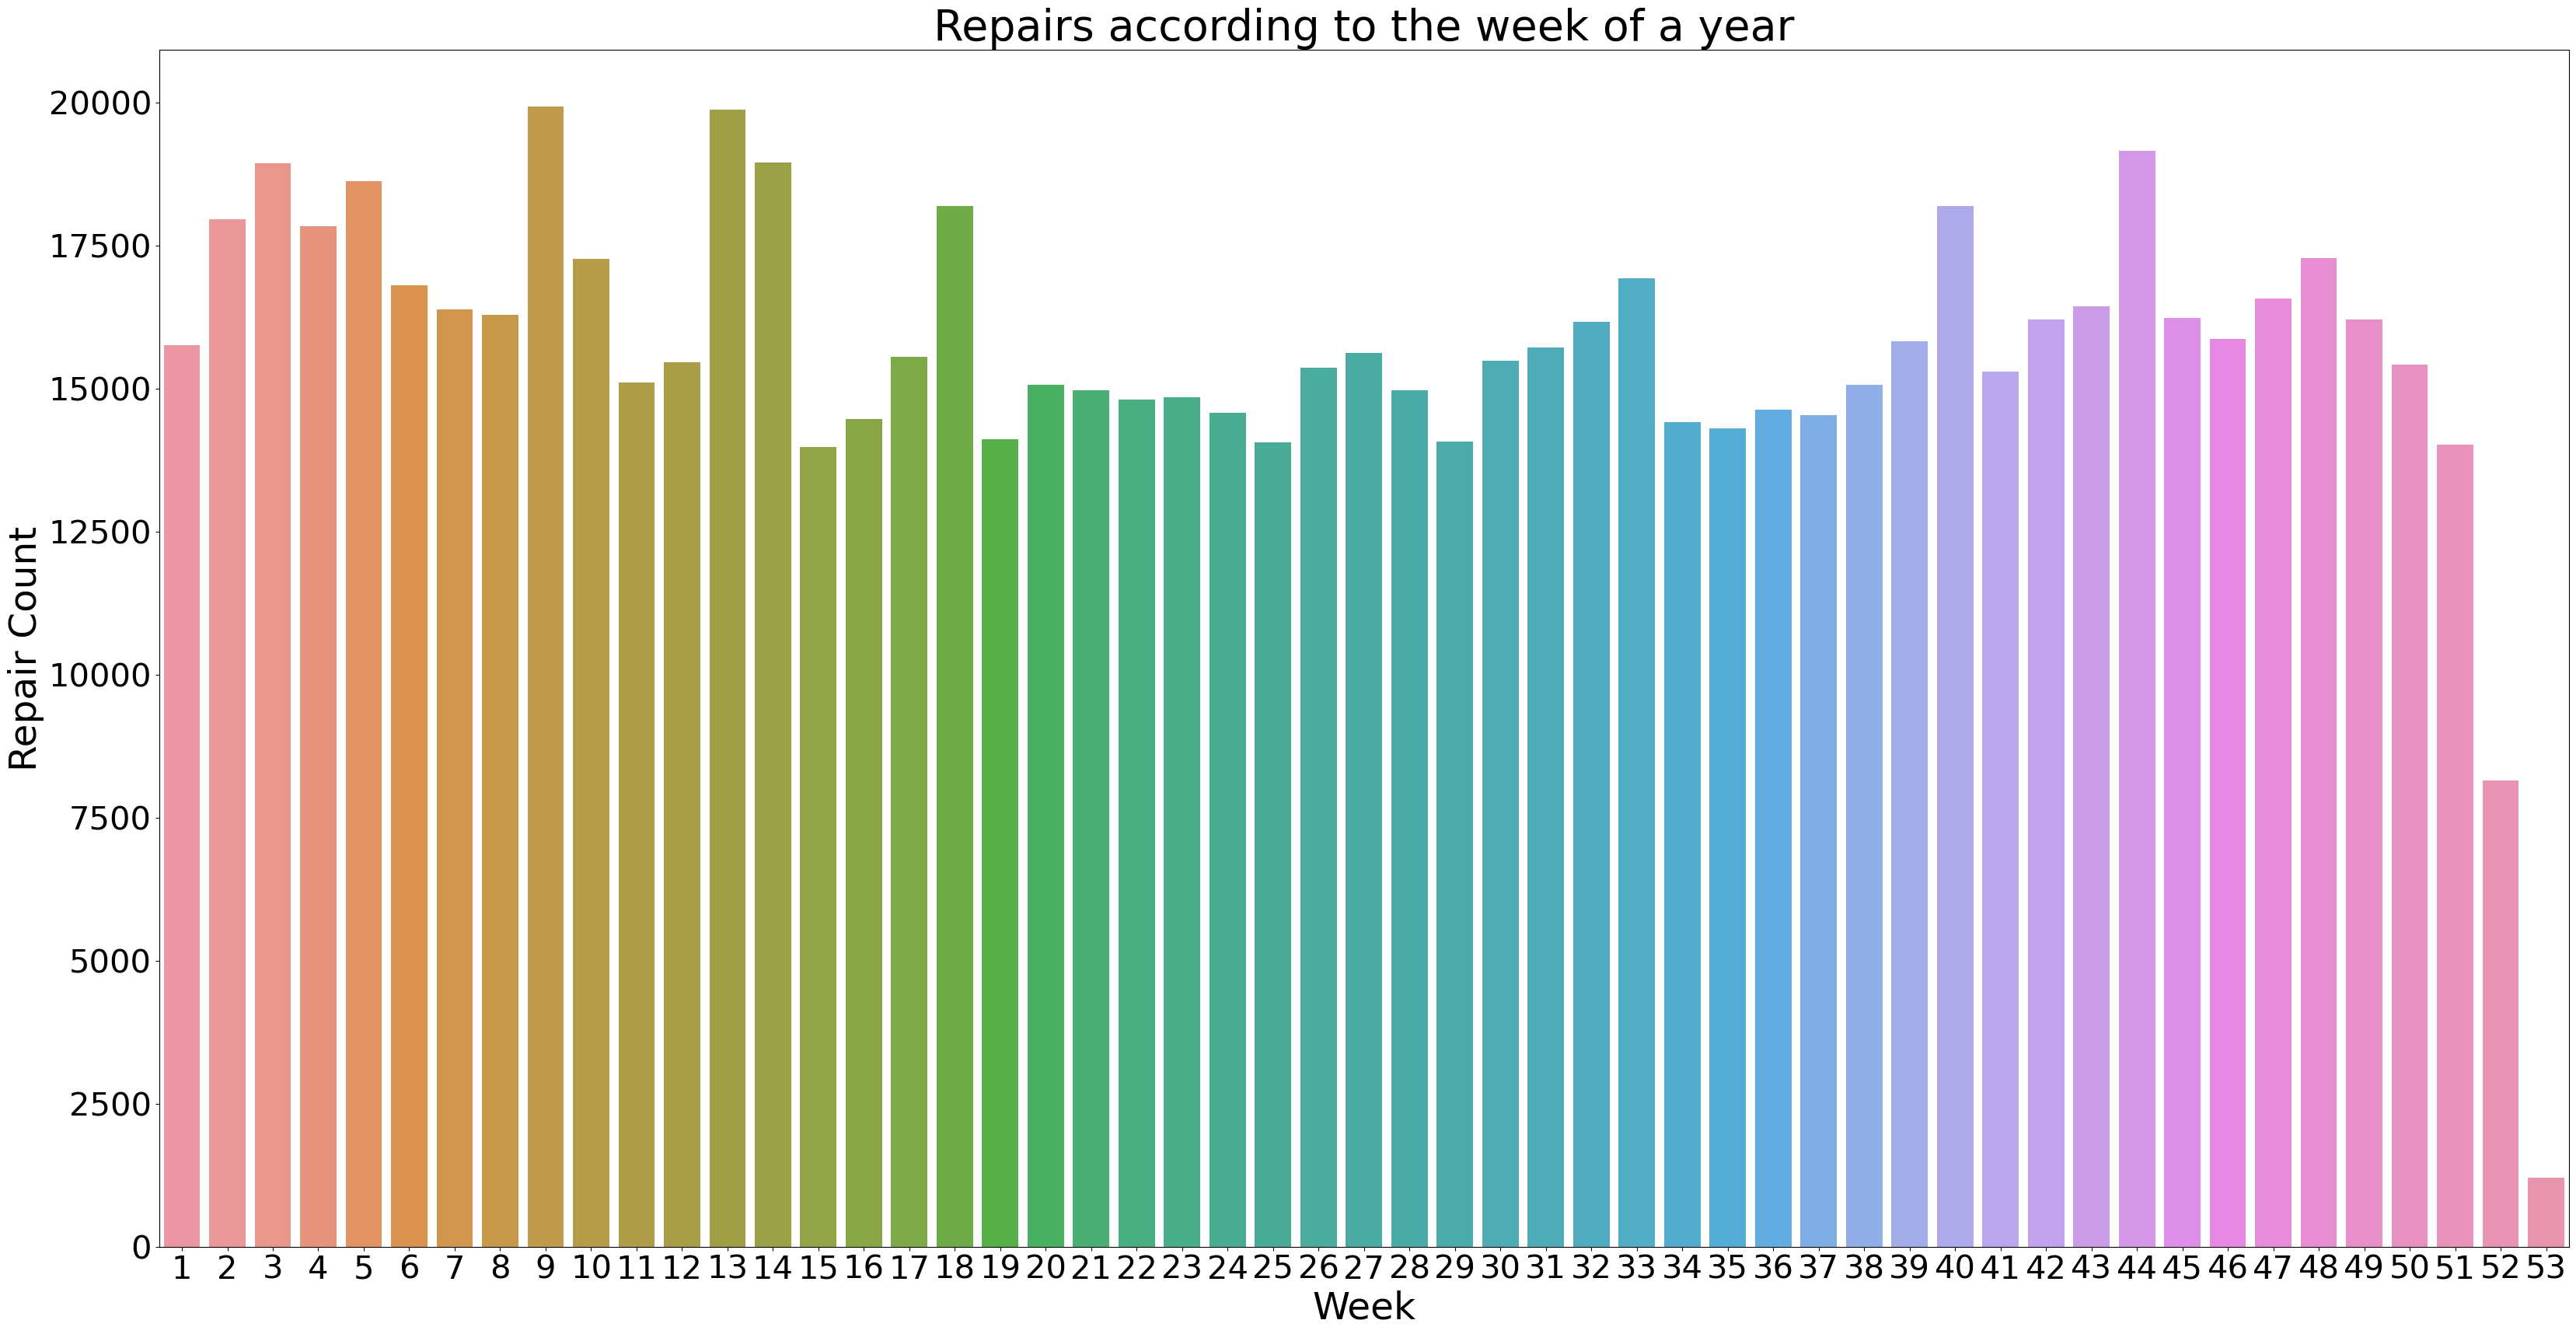

In [10]:
plt.figure(figsize = (40,20))
ax = sns.countplot(x='Week', data=job2)
plt.title('Repairs according to the week of a year', fontsize = 40)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30) 
ax.set_xlabel('Week', fontsize=35)
ax.set_ylabel('Repair Count', fontsize=35)

plt.show()

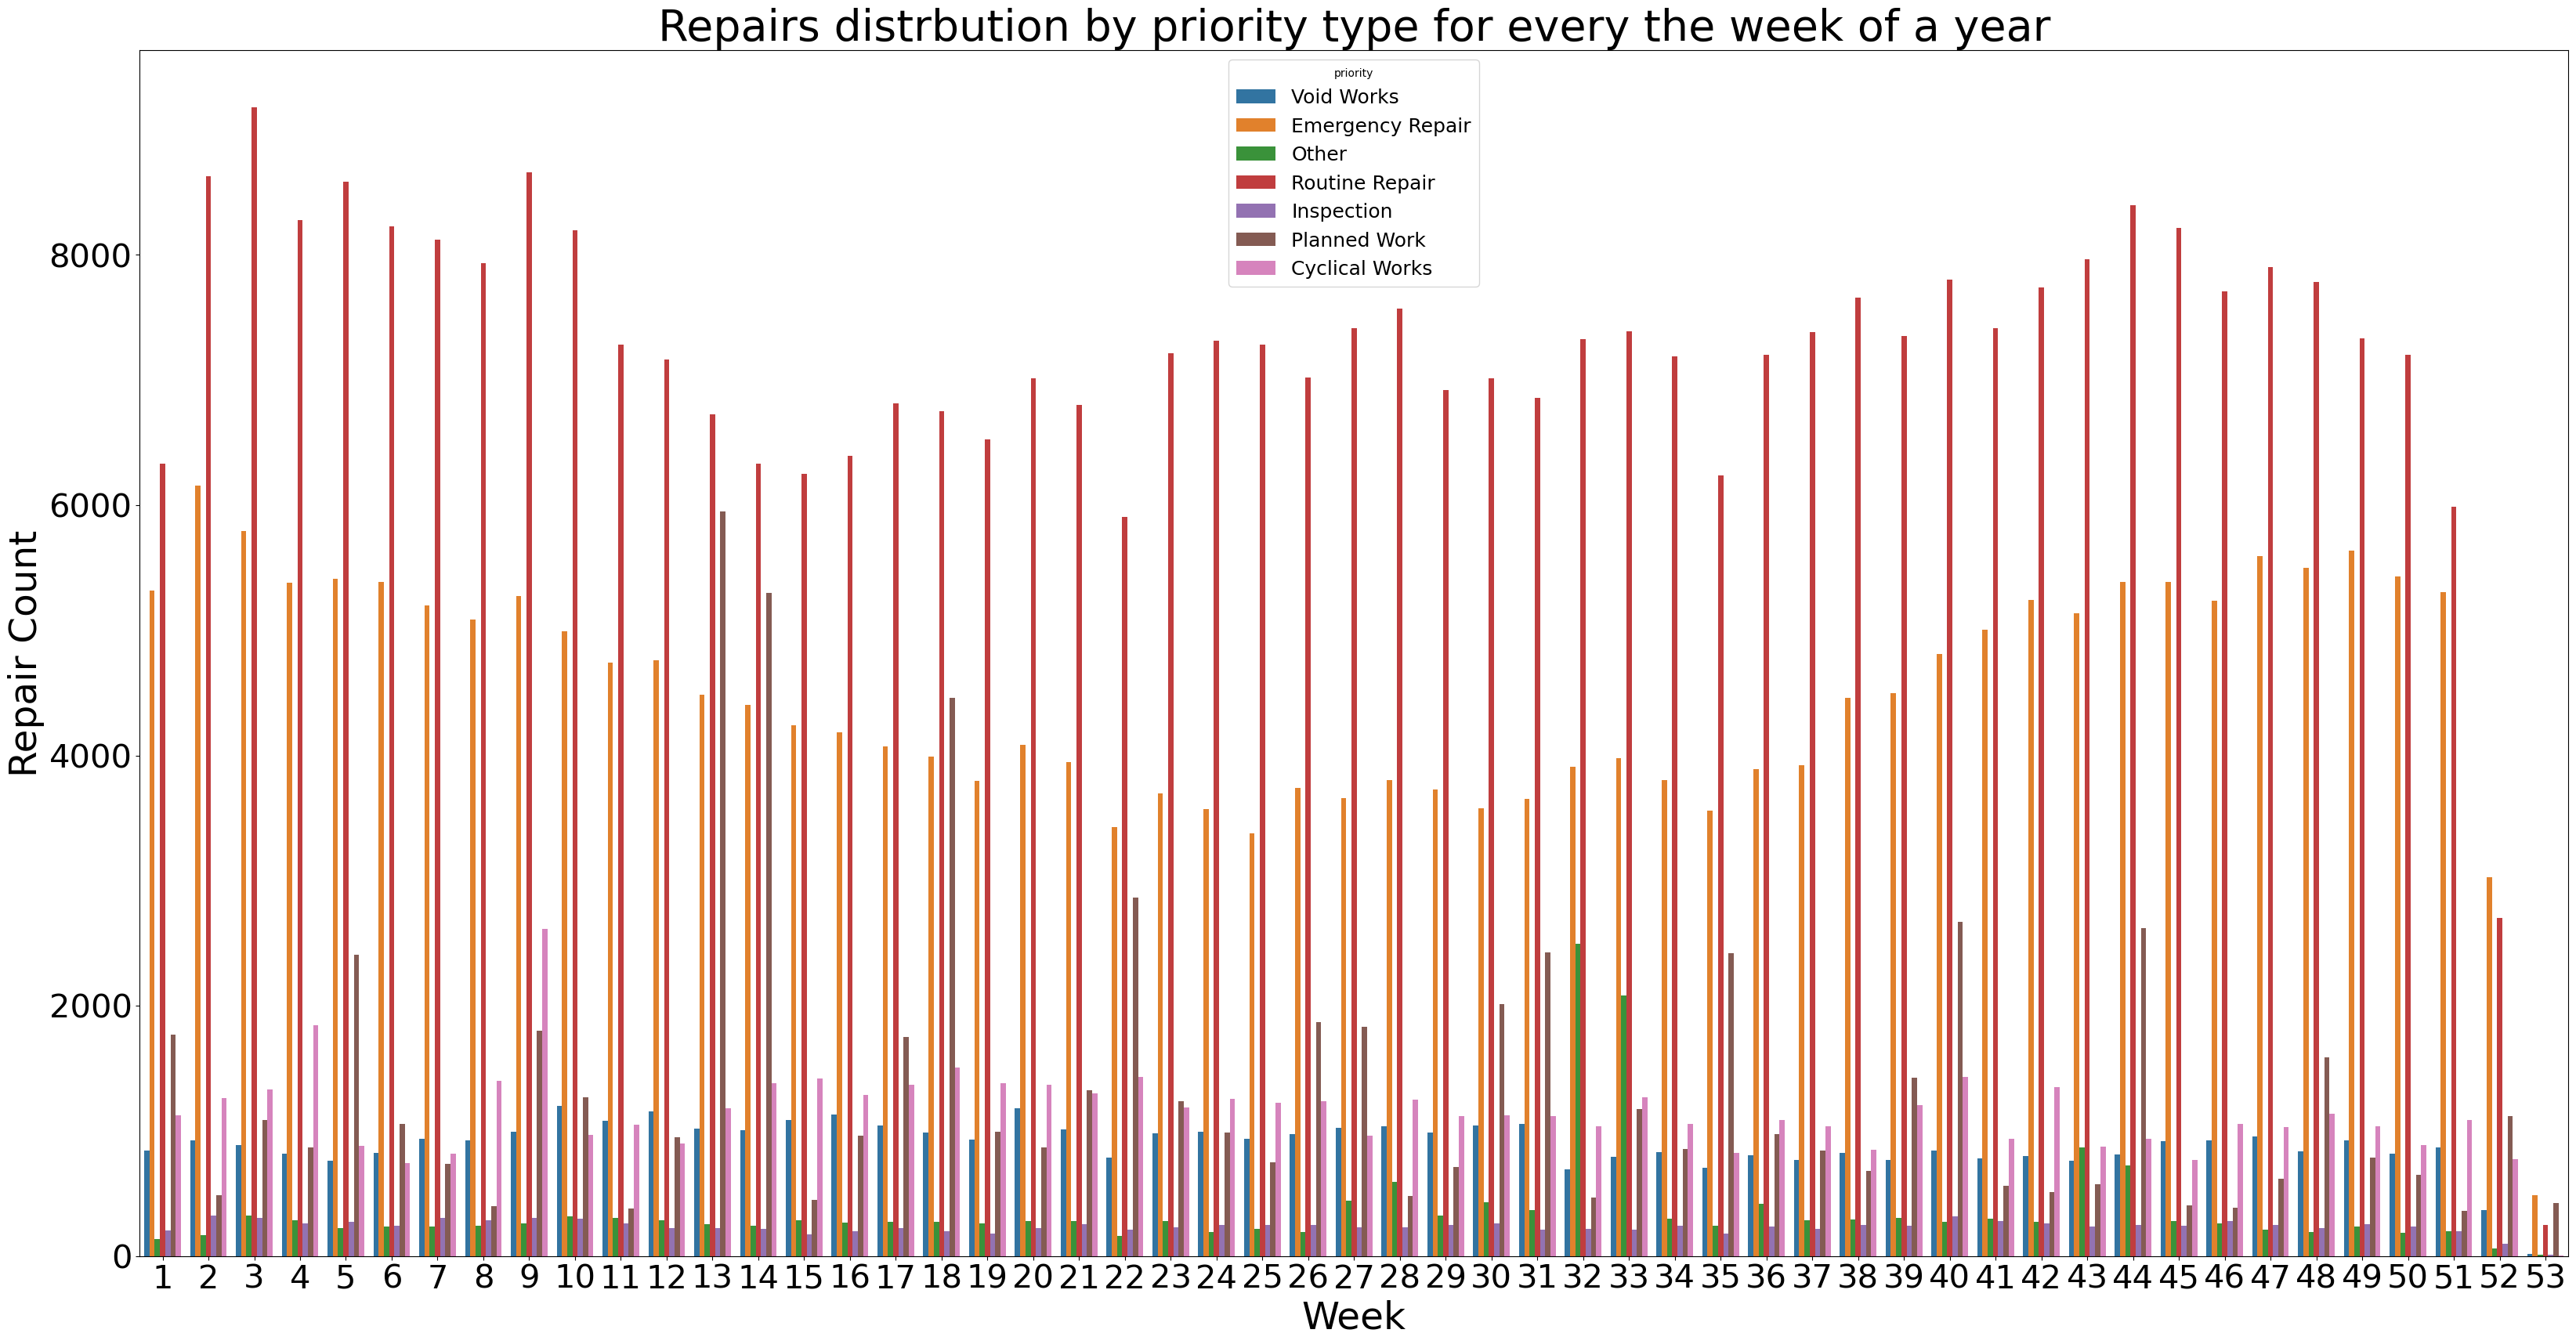

In [11]:
plt.figure(figsize = (40,20))
ax = sns.countplot(x='Week', data=job2, hue = 'pty_classification')
plt.title('Repairs distrbution by priority type for every the week of a year', fontsize = 40)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30) 
ax.set_xlabel('Week', fontsize=35)
ax.set_ylabel('Repair Count', fontsize=35)
plt.legend(fontsize = 18, title = 'priority')
plt.show()

Greater number of Planned repairs in April and May

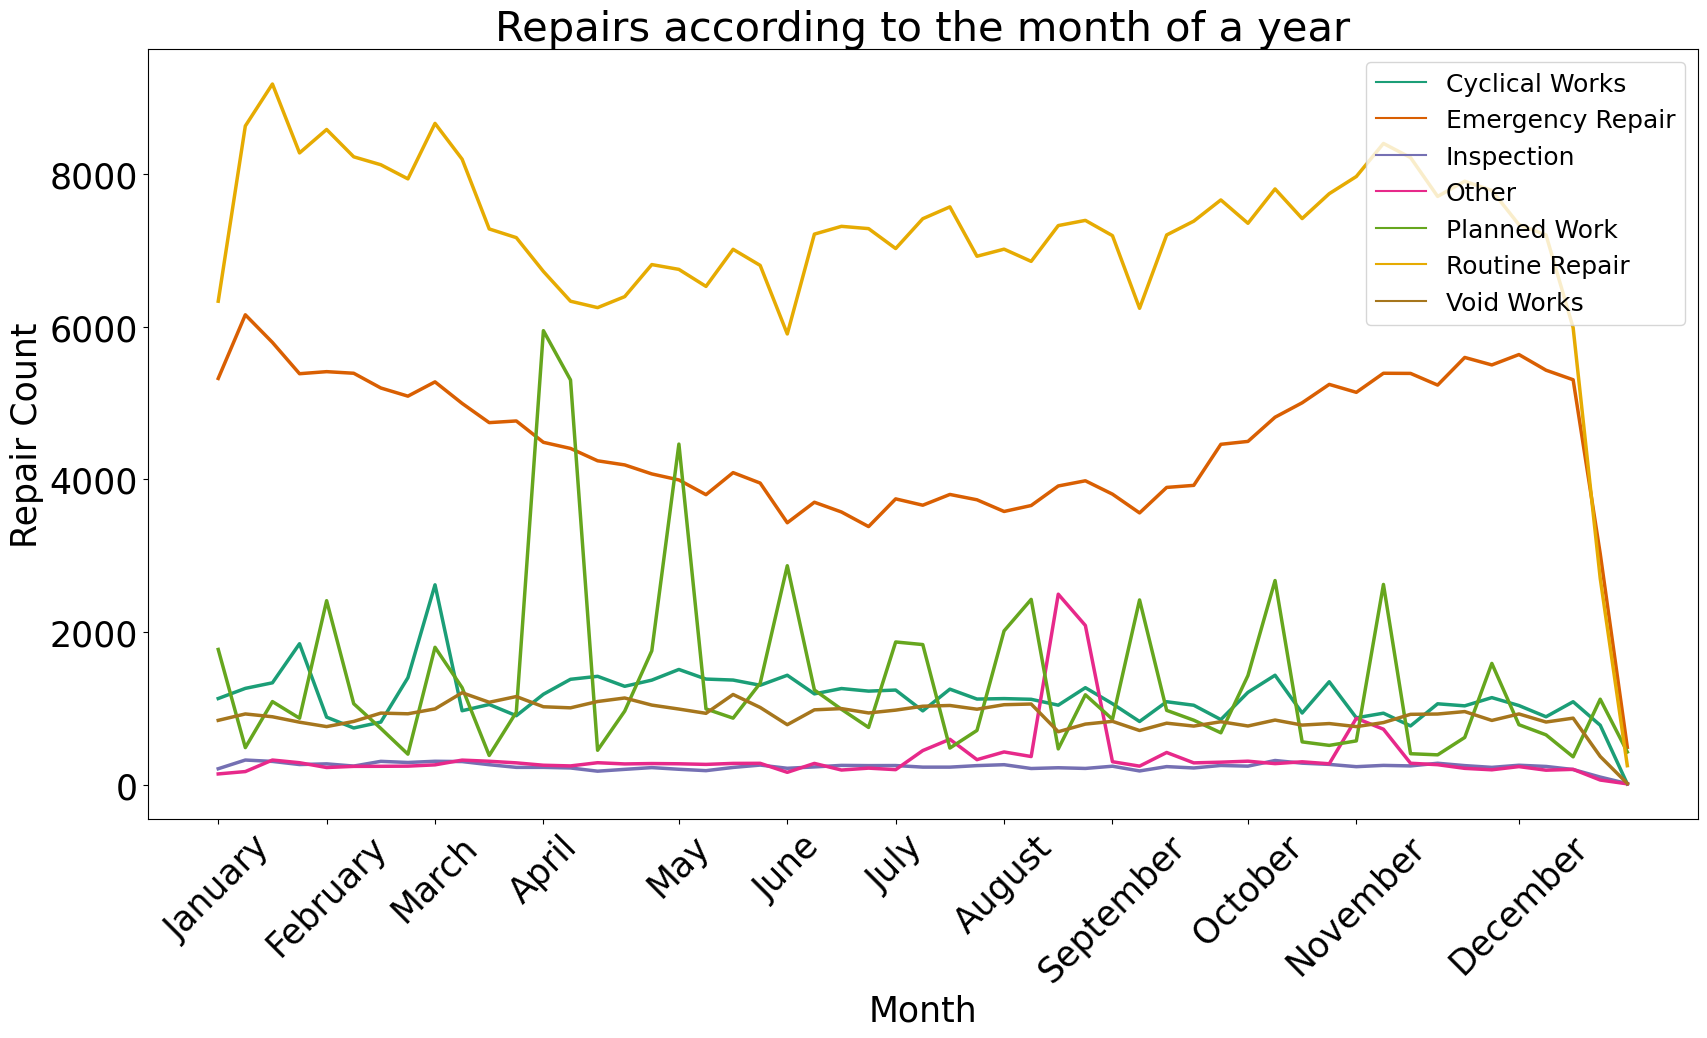

In [12]:
week_priority_count = job2.groupby(['Week','pty_classification']).size()
week_priority_count = week_priority_count.reset_index()
week_priority_count.columns = ['Week','priority','count']

month_map_dict = {
    1: 'January',
    5: 'February',
    9: 'March',
    13: 'April',
    18: 'May',
    22: 'June',
    26: 'July',
    30: 'August',
    34: 'September',
    39: 'October',
    43: 'November',
    49: 'December'
}

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Week', y='count', hue='priority', data=week_priority_count, palette='Dark2', linewidth=2.5)

# changing week ticks to month
tick_positions = list(month_map_dict.keys())
tick_labels = list(month_map_dict.values())

plt.xticks(tick_positions, tick_labels, rotation=45, fontsize=28)

plt.title('Repairs according to the month of a year', fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_xlabel('Month', fontsize=25)
ax.set_ylabel('Repair Count', fontsize=25)
plt.grid(False)

plt.legend(fontsize=18)
plt.show()


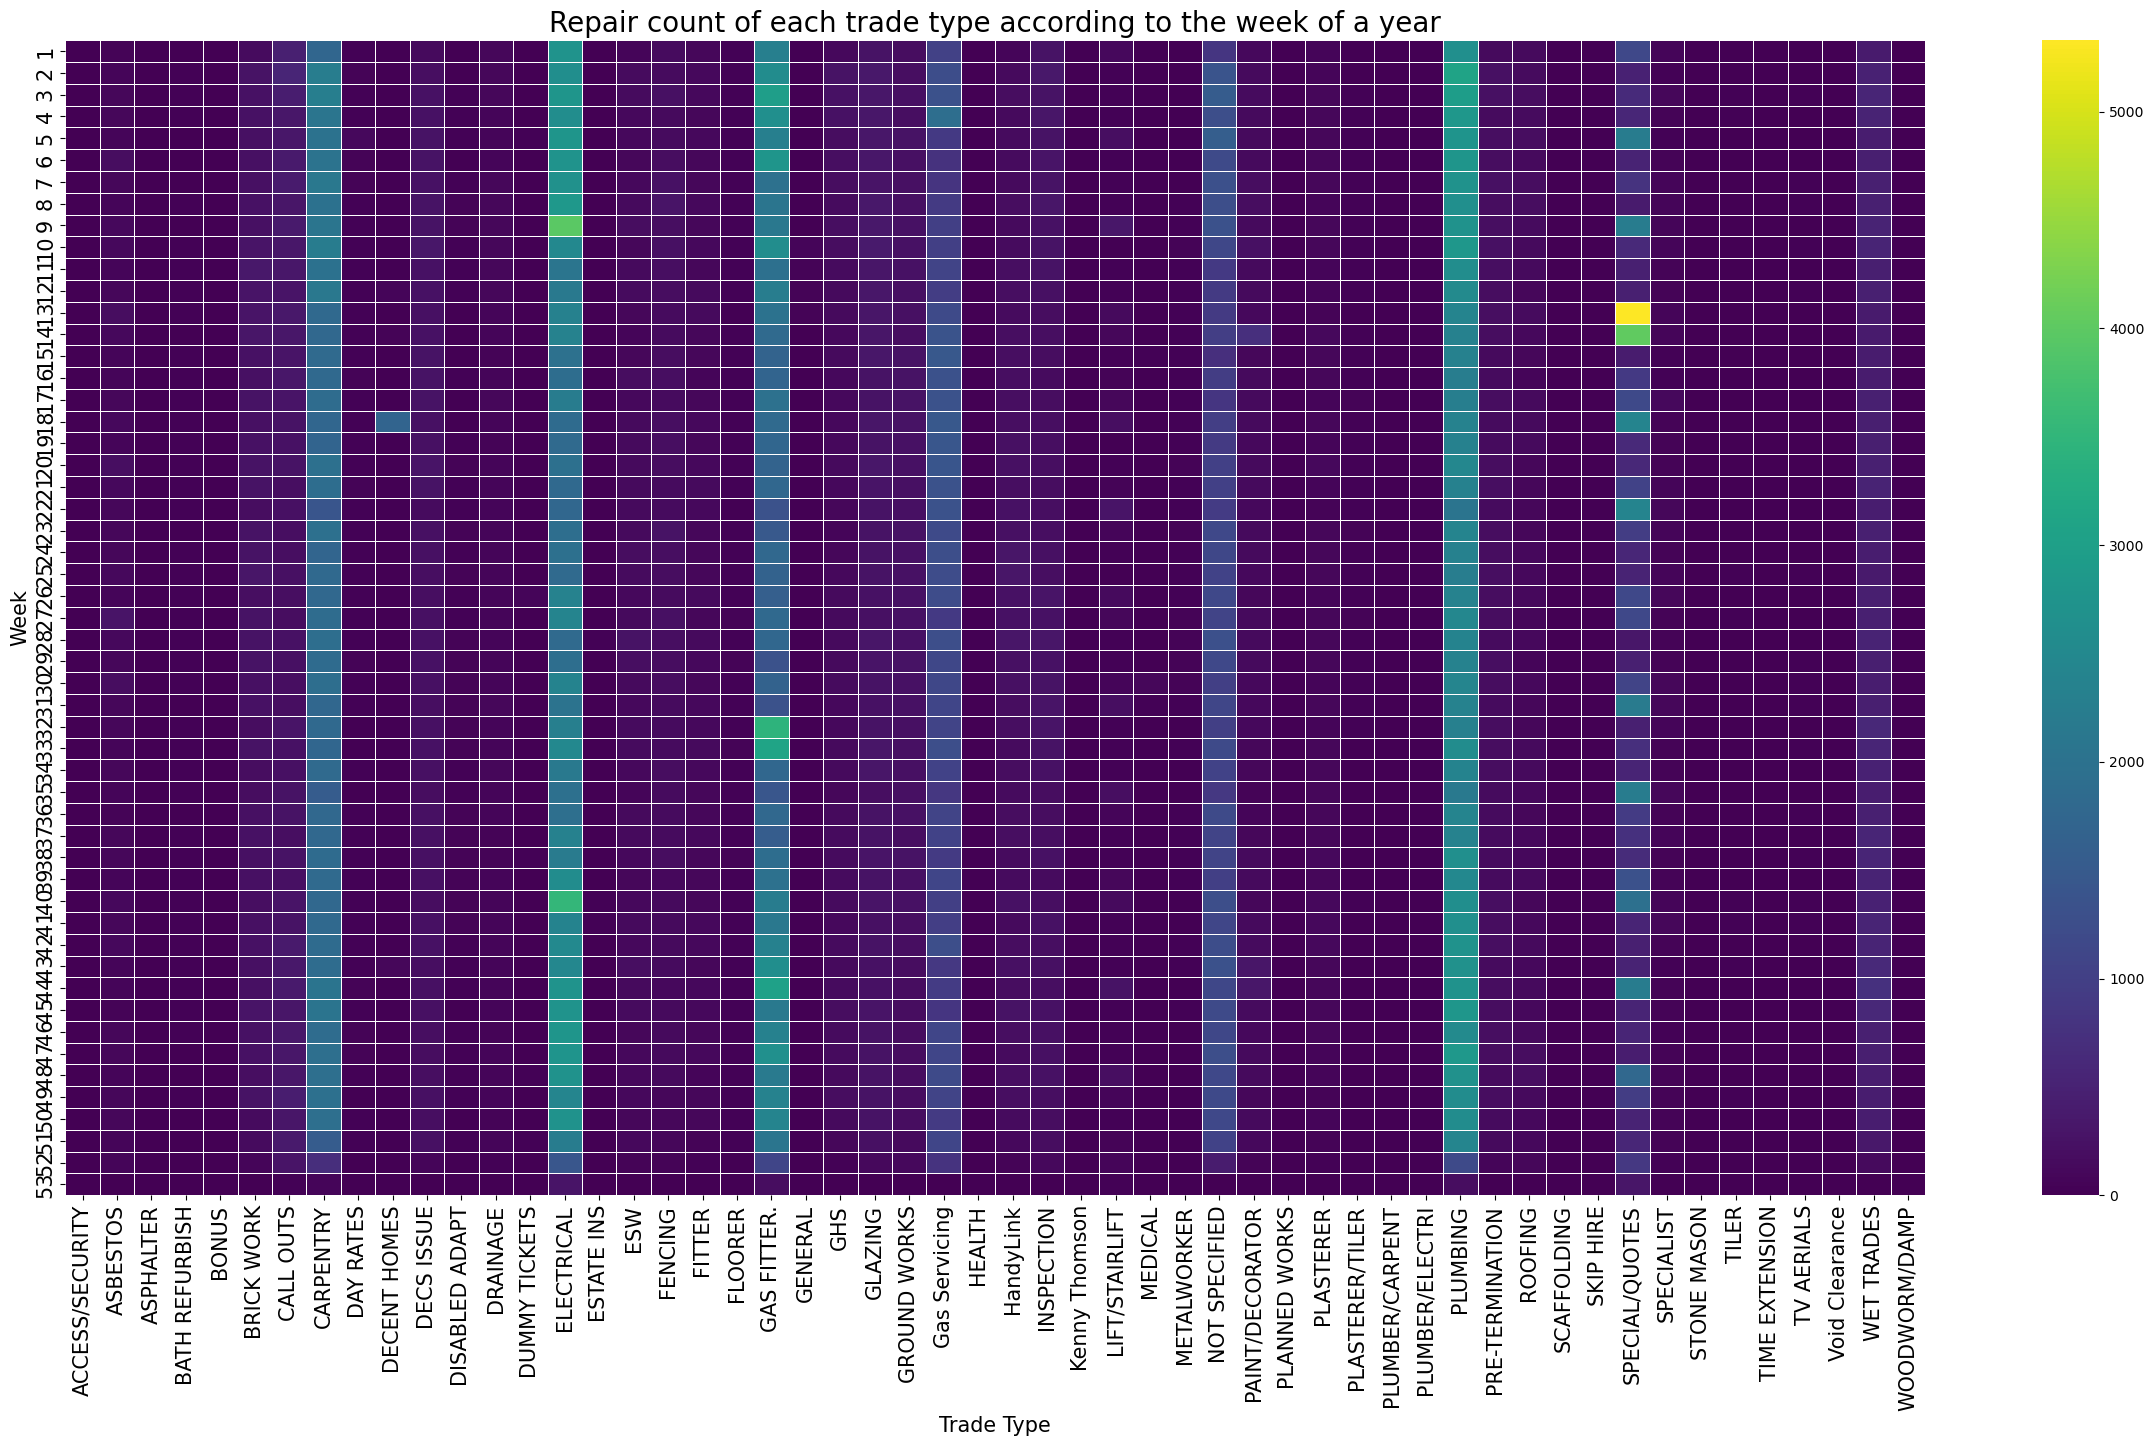

In [13]:
week_trade_count = job2.groupby(['Week', 'sor']).size().reset_index(name='count')
week_trade_count_pivot = week_trade_count.pivot_table(index='Week', columns='sor', values='count', fill_value=0)

plt.figure(figsize=(30, 15))
ax = sns.heatmap(week_trade_count_pivot, cmap='viridis', annot=False,fmt='d', linewidths=.5)
plt.title('Repair count of each trade type according to the week of a year', fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Trade Type', fontsize=15)
ax.set_ylabel('Week', fontsize=15)
plt.show()


### Calculating number of 'report counts' for each date in the dataframe

In [15]:
job_counts = job.groupby('job_report_date').count()['Year']
job_counts = job_counts.reset_index()
job_counts.columns = ['job_report_date', 'Count']
job_counts.set_index('job_report_date', inplace = True)

job_date_count_map = job_counts.to_dict()['Count']
job2['repair_count'] = job2['job_report_date'].map(job_date_count_map)

reports_per_date = pd.DataFrame(job2.groupby('job_report_date').count()['repair_count'])
# dropping 1990 
reports_per_date = reports_per_date.reset_index().drop(0, axis = 0)
# print(reports_per_date.type)
reports_per_date

,job_report_date,repair_count
1,1996-02-27,71
2,1996-02-28,61
3,1996-02-29,163
4,1996-03-01,86
5,1996-03-02,3
...,...,...
8753,2023-06-11,5
8754,2023-06-12,195
8755,2023-06-13,87
8756,2023-06-14,85


# Merge weather data with repair data for every date

#### Mapping weather codes to Gloucester weather data

In [18]:
# get descriptions of weather codes
wmo.drop(0, axis = 1, inplace = True)
wmo.columns = ['description', 'weather condition']
# map weather codes to theri respective weather descriptions for analysis
my_weather_map = wmo['weather condition']
gl['weather_condition'] = gl['weathercode (wmo code)'].map(my_weather_map)

gl = gl.reindex(columns=['time', 'weathercode (wmo code)', 'weather_condition','temperature_2m_max (°C)',
                           'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
                           'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
                           'apparent_temperature_mean (°C)', 'shortwave_radiation_sum (MJ/m²)',
                           'precipitation_sum (mm)', 'rain_sum (mm)', 'snowfall_sum (cm)',
                           'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
                           'windgusts_10m_max (km/h)', 'winddirection_10m_dominant (°)', ])

gl.head()

,time,weathercode (wmo code),weather_condition,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
0,1996-02-27,3,Cloudy,8.3,-3.0,1.979167,4.9,-6.7,-1.279167,9.09,0.0,0.0,0.0,0,9.6,18.0,302.703520
1,1996-02-28,2,State of sky on the whole unchanged,8.0,-1.9,2.462500,3.7,-5.5,-1.175000,11.31,0.0,0.0,0.0,0,14.8,29.5,41.096363
2,1996-02-29,3,Cloudy,8.3,-2.8,2.737500,4.7,-6.8,-0.991667,10.40,0.0,0.0,0.0,0,16.8,34.2,83.908630
3,1996-03-01,3,Cloudy,7.5,0.4,4.345833,3.6,-3.1,0.795833,5.60,0.0,0.0,0.0,0,18.4,36.7,110.480460
4,1996-03-02,51,Drizzle light,9.3,4.4,6.837500,6.2,0.9,3.300000,3.36,0.4,0.4,0.0,3,20.2,35.3,105.079765


### WMO code = 2 means that the weather at present is the same as last recorded weather (today is same as yesterday since this is daily weather data)
Replace 2 with previous weather condition

In [19]:
#First replace 2 with NaN, then fill NaN in the weather condition column with the value of the preceding row 
modified_weather_codes = gl[['weathercode (wmo code)', 'weather_condition']]
modified_weather_codes[modified_weather_codes['weathercode (wmo code)']==2] = np.NaN
# modified_weather_codes
modified_weather_codes1 = modified_weather_codes.fillna(method='ffill')
modified_weather_codes1.columns = ['weathercode (wmo code) modified','weather_condition modified']
#modified_weather_codes1
gl_modified = pd.concat([gl, modified_weather_codes1], axis = 1)

gl_modified = gl_modified.reindex(columns=['time', 'weathercode (wmo code)', 'weather_condition', 
                                           'weathercode (wmo code) modified', 'weather_condition modified',
                                           'temperature_2m_max (°C)',
                                           'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
                                           'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
                                           'apparent_temperature_mean (°C)', 'shortwave_radiation_sum (MJ/m²)',
                                           'precipitation_sum (mm)', 'rain_sum (mm)', 'snowfall_sum (cm)',
                                           'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
                                           'windgusts_10m_max (km/h)', 'winddirection_10m_dominant (°)', ])


gl_updated = gl_modified[['time', 'weathercode (wmo code) modified', 'weather_condition modified',
           'temperature_2m_max (°C)',
           'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
           'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
           'apparent_temperature_mean (°C)', 'shortwave_radiation_sum (MJ/m²)',
           'precipitation_sum (mm)', 'rain_sum (mm)', 'snowfall_sum (cm)',
           'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
           'windgusts_10m_max (km/h)', 'winddirection_10m_dominant (°)', ]]


C:\Users\adeel\AppData\Local\Temp\ipykernel_8240\47289441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_weather_codes[modified_weather_codes['weathercode (wmo code)']==2] = np.NaN


### Number of days for every weather condition

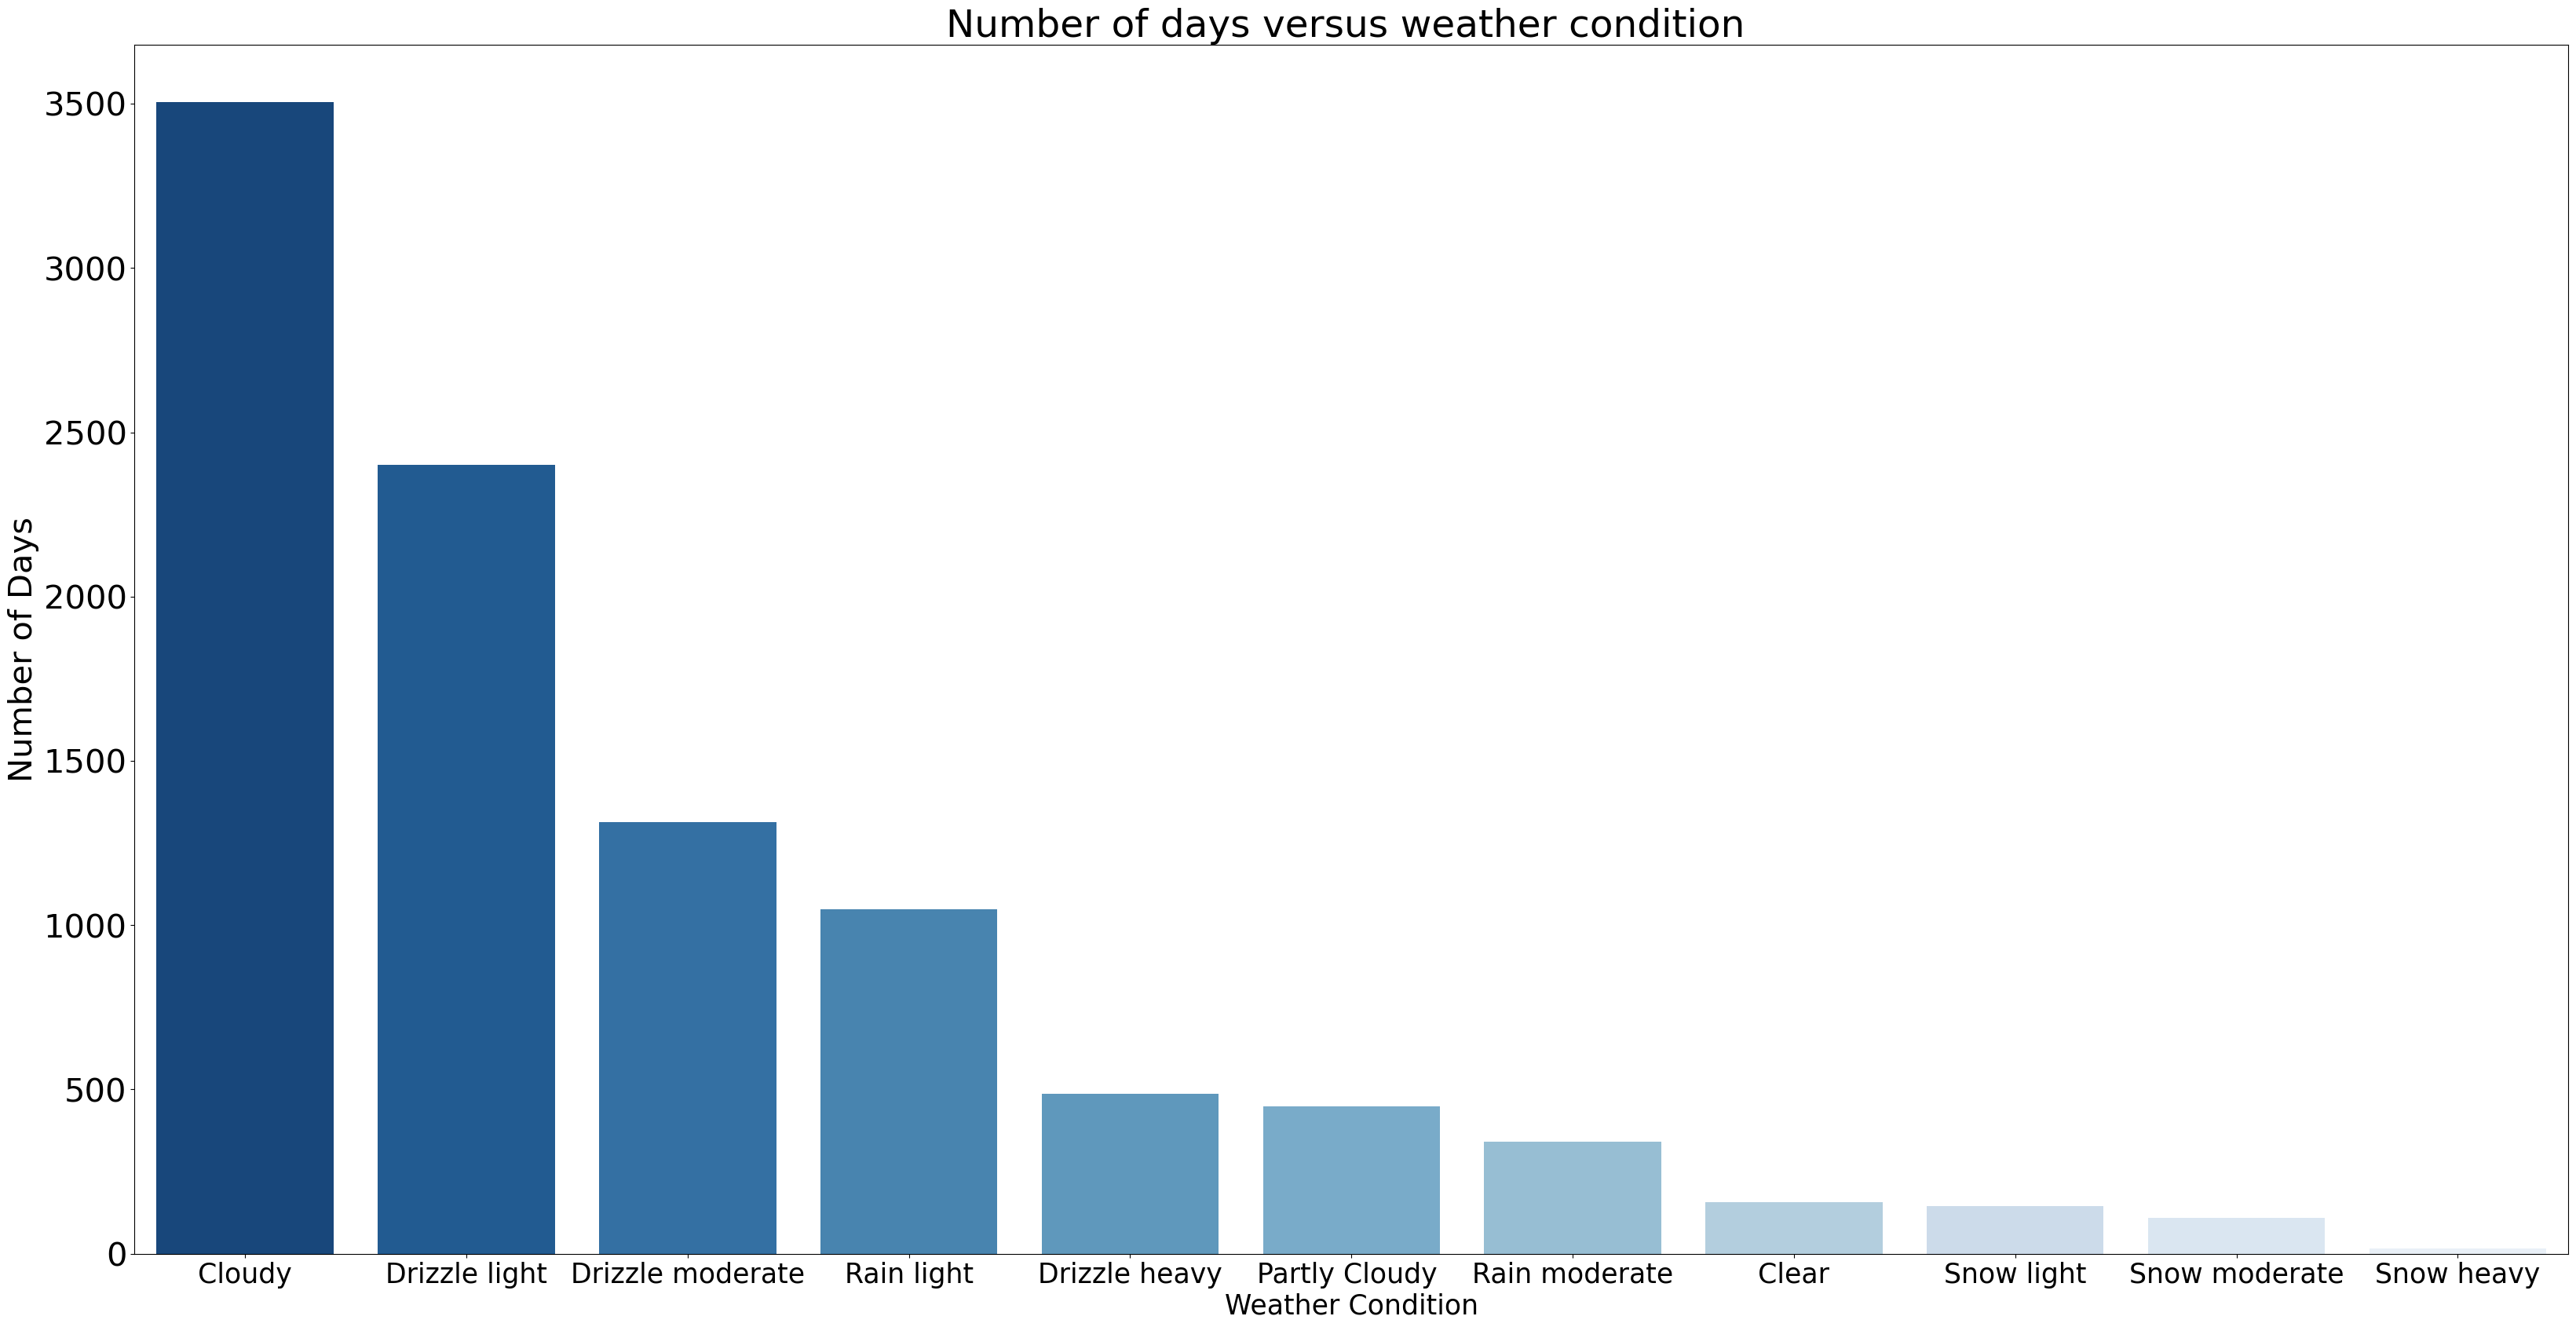

In [21]:
plt.figure(figsize = (40,20))
ax = sns.countplot(x='weather_condition modified', order = gl_updated['weather_condition modified'].value_counts().index,  data=gl_updated, palette = 'Blues_r')
plt.title('Number of days versus weather condition ', fontsize = 35)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=30)
ax.set_xlabel('Weather Condition', fontsize=25)
ax.set_ylabel('Number of Days', fontsize=30)
plt.show()


The weather condition distribution for the 9971 dates in the dataset. For ~35% of the unique dates in the dataset, the weather was Cloudy, and it drizzled lightly for ~24% of the days, and heavily for ~5% of the days. It snowed for less than 3% of the days, and rained for less than 15%

##### convert DATE values in WEATHER dataset to DATETIME type for easy merging with REPAIR dataset

In [22]:
gl_updated.time = gl_updated.time.apply(lambda x: x.date())
job3 = gl_updated.merge(reports_per_date, how='inner', left_on='time', right_on='job_report_date')
# Dropping numerical weather code and only keeping corresponding textual code to later encode
job4 = job3.drop('weathercode (wmo code) modified', axis = 1)


C:\Users\adeel\AppData\Local\Temp\ipykernel_8240\2849518561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gl_updated.time = gl_updated.time.apply(lambda x: x.date())


#### Check dates with very high number of repairs

In [23]:
job4[job4['repair_count']>=1000][['time', 'weather_condition modified', 'precipitation_sum (mm)', 'repair_count']]

,time,weather_condition modified,precipitation_sum (mm),repair_count
3314,2008-05-01,Drizzle light,1.700000,1826
5049,2013-04-01,Cloudy,0.000000,1186
5412,2014-04-01,Drizzle light,0.800000,1105
5773,2015-04-01,Drizzle light,0.700000,1651
8316,2022-04-01,Drizzle light,1.000000,1063
8681,2023-04-01,Drizzle heavy,8.400001,1263


Nothing special about these days except that reports were made on the FIRST DAY of the month and all were made around the 13-18 week mark.
Means high repair counts HAVE NOTHNG to do with WEATHER. 


### Average repair for every weather condition

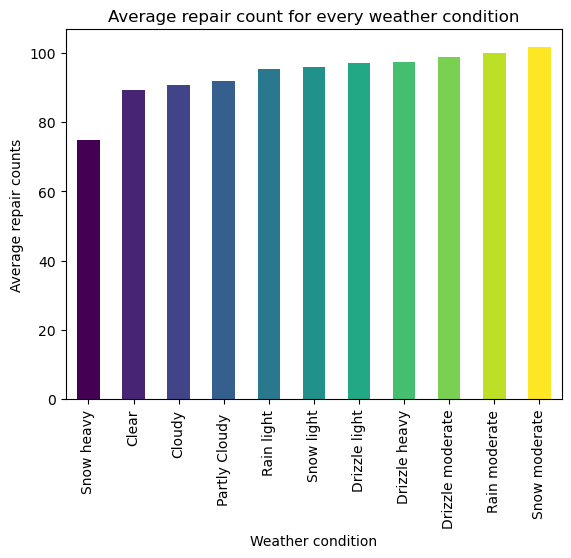

In [24]:
wet_cond = job4.groupby('weather_condition modified')['repair_count'].mean()
wet_cond_repairs_sorted = wet_cond.sort_values()
num_bars = len(wet_cond_repairs_sorted)

# custom colormap with the same number of colors as bars
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

# bar plot with custom colors
wet_cond_repairs_sorted.plot(kind='bar', color=colors)
plt.xlabel('Weather condition')
plt.ylabel('Average repair counts')
plt.title('Average repair count for every weather condition')
plt.show()

### Average repair for total precipitation

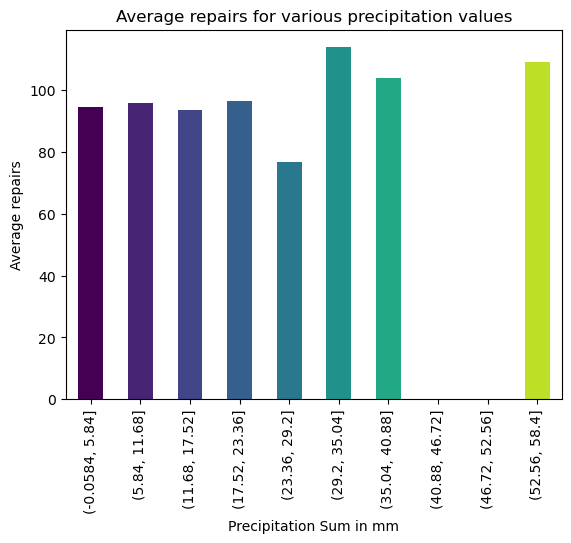

In [26]:
# binning precipitation values
prec = pd.cut(job4['precipitation_sum (mm)'], bins=10)
# repair count to be binned
job4['precipitation_sum (mm)_bins'] = prec
# number of rows corresponding to each bin (repair count)
newvar = job4.groupby('precipitation_sum (mm)_bins')['repair_count'].mean()
# custom colormap with the same number of colors as bars
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
# bar plot with custom colors
newvar.plot(kind='bar', color=colors)

plt.xlabel('Precipitation Sum in mm')
plt.ylabel('Average repairs')
plt.title('Average repairs for various precipitation values')
plt.show()



### Average repair for mean snowfall

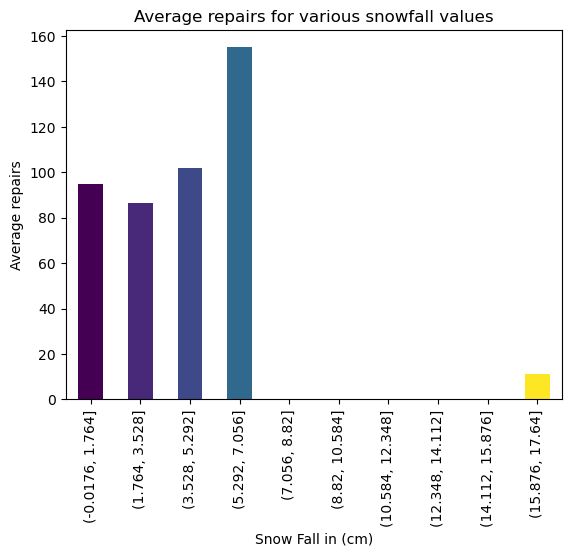

In [27]:
# binning snowfall values
snow = pd.cut(job4['snowfall_sum (cm)'], bins=10)
job4['snowfall_sum (cm)_bins'] = snow
# number of instances for each bin (repair count)
avg_snow_count_per_bin = job4.groupby('snowfall_sum (cm)_bins')['repair_count'].mean()
num_bars = len(avg_snow_count_per_bin)
# custom colormap 
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
# bar plot 
avg_snow_count_per_bin.plot(kind='bar', color=colors)
plt.xlabel('Snow Fall in (cm)')
plt.ylabel('Average repairs')
plt.title('Average repairs for various snowfall values')
plt.show()

### Average repair for mean temperature

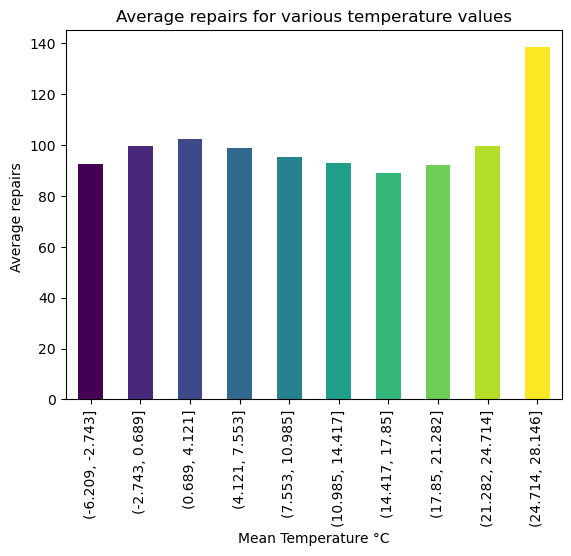

In [28]:
# binning temperature values
temp = pd.cut(job4['temperature_2m_mean (°C)'], bins=10)
job4['temperature_2m_mean_bins'] = temp

# number of instances for each temperature bin (repair count)
avg_temp_count = job4.groupby('temperature_2m_mean_bins')['repair_count'].mean()
num_bars = len(avg_temp_count)
# custom colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
# plotting average repair count for each temperature bin
avg_temp_count.plot(kind='bar', color=colors)
plt.xlabel('Mean Temperature °C')
plt.ylabel('Average repairs ')
plt.title('Average repairs for various temperature values')
plt.show()

### Average repair for windgusts

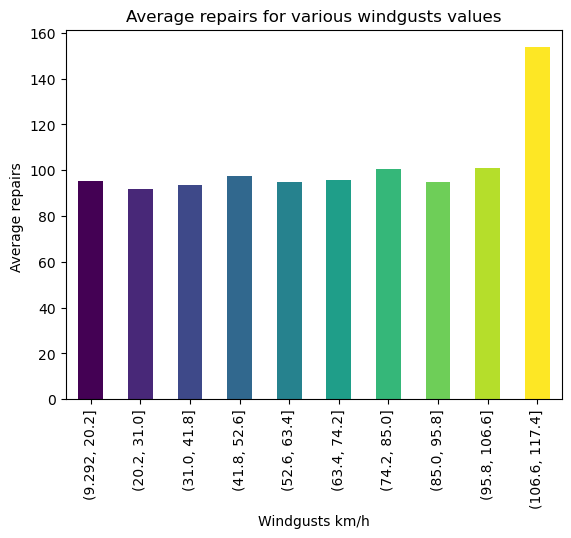

In [29]:
# binning windgust values
wind = pd.cut(job4['windgusts_10m_max (km/h)'], bins=10)
job4['windgusts_10m_max (km/h)_bins'] = wind

# number of datapoints for each windgust bin (repair count)
avg_wind_count = job4.groupby('windgusts_10m_max (km/h)_bins')['repair_count'].mean()
num_bars = len(avg_wind_count)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
# plotting average repair count for each windgust bin
avg_wind_count.plot(kind='bar', color=colors)

plt.xlabel('Windgusts km/h')
plt.ylabel('Average repairs ')
plt.title('Average repairs for various windgusts values')
plt.show()

### Average repair for radiation

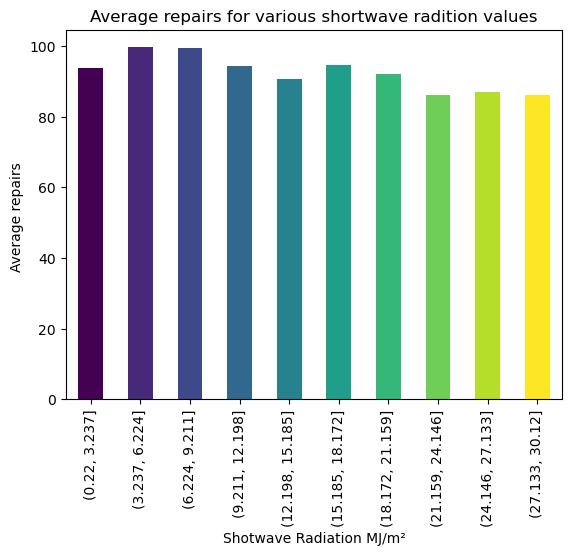

In [30]:
# binning shortwave radiation values
swr = pd.cut(job4['shortwave_radiation_sum (MJ/m²)'], bins=10)
job4['shortwave_radiation_sum (MJ/m²)_bins'] = swr
# number of datapoints for each swr bin (repair count)
avg_swr_count = job4.groupby('shortwave_radiation_sum (MJ/m²)_bins')['repair_count'].mean()
num_bars = len(avg_swr_count)

colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
# plotting average repair count for each swr bin
avg_swr_count.plot(kind='bar', color=colors)
plt.xlabel('Shotwave Radiation MJ/m²')
plt.ylabel('Average repairs ')
plt.title('Average repairs for various shortwave radition values')
plt.show()

#### ====================================================


###                           Dropping all rows with planned works


#### ====================================================

Planned works are anomolous and may distort average repair counts for each weather feature bin. Therefore, we drop all Planned repairs and observe if there is any change in mean repair count based on our binned weather features

In [31]:
job5 = job2[job2['pty_classification'] != 'Planned Work']
# repair count for all priority types except Planned Works
repair_count_no_planned = job5.groupby('job_report_date').size().reset_index(name='report_count')
job6 = job5.merge(repair_count_no_planned, how='left', left_on='job_report_date', right_on='job_report_date')
job6[job6['report_count']>=500][['reported-dat', 'pty_classification', 'report_count']]

,reported-dat,pty_classification,report_count
41300,1997-08-05,Routine Repair,562
41301,1997-08-05,Other,562
41302,1997-08-05,Other,562
41303,1997-08-05,Other,562
41304,1997-08-05,Other,562
...,...,...,...
565477,2017-01-26,Cyclical Works,646
565478,2017-01-26,Cyclical Works,646
565479,2017-01-26,Cyclical Works,646
565480,2017-01-26,Cyclical Works,646


##### Repeating the code for getting repair counts for various binned weather features

### Average repair for every weather condition


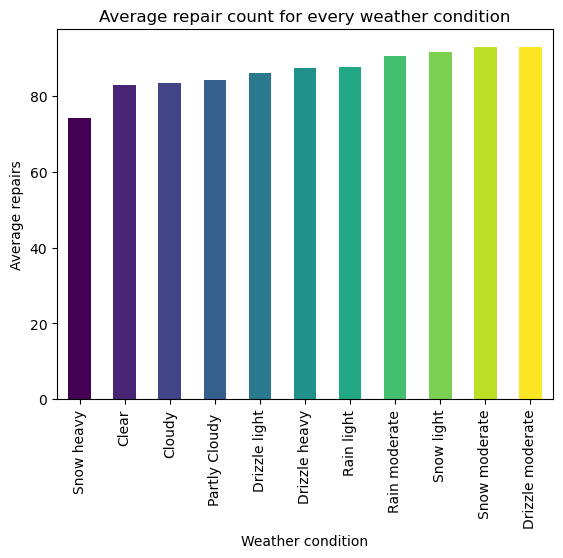

In [32]:
job7 = gl_updated.merge(repair_count_no_planned, how='inner', left_on='time', right_on='job_report_date')
job7 = job7.drop('weathercode (wmo code) modified', axis = 1)

wet_cond_count = job7.groupby('weather_condition modified')['report_count'].mean()
wet_cond_count_ordered = wet_cond_count.sort_values()

num_bars = len(wet_cond_count)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
wet_cond_count_ordered.plot(kind='bar', color=colors)

plt.xlabel('Weather condition')
plt.ylabel('Average repairs')
plt.title('Average repair count for every weather condition')
plt.show()

### Average repair for total precipitation (mm)

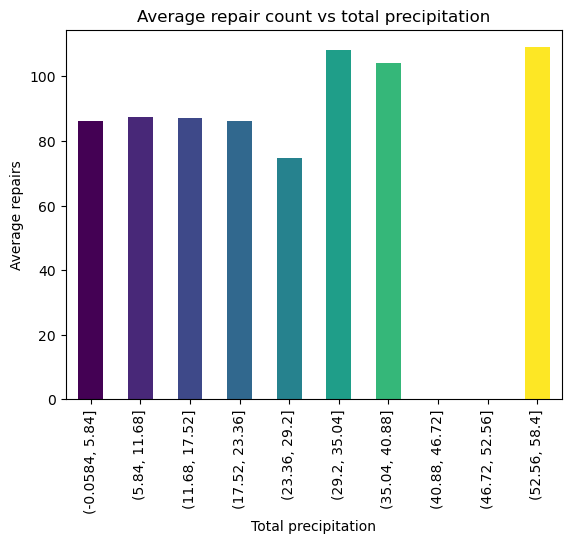

In [33]:
prec = pd.cut(job7['precipitation_sum (mm)'], bins=10)
job7['precipitation_sum (mm)_bins'] = prec
avg_prec_count_no_planned = job7.groupby('precipitation_sum (mm)_bins')['report_count'].mean()
num_bars = len(avg_prec_count_no_planned)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
avg_prec_count_no_planned.plot(kind='bar', color=colors)

plt.xlabel('Total precipitation')
plt.ylabel('Average repairs')
plt.title('Average repair count vs total precipitation')
plt.show()

### Average repair for mean snowfall (cm)

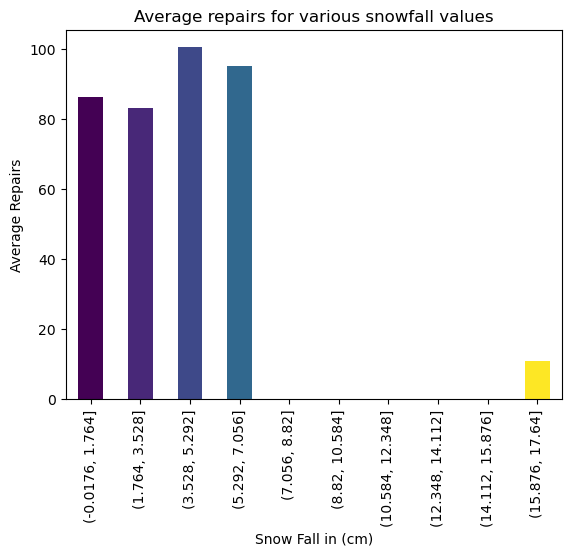

In [34]:
snow = pd.cut(job7['snowfall_sum (cm)'], bins=10)
job7['snowfall_sum (cm)_bins'] = snow

avg_snow_count_no_planned = job7.groupby('snowfall_sum (cm)_bins')['report_count'].mean()
num_bars = len(avg_snow_count_no_planned)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
avg_snow_count_no_planned.plot(kind='bar', color=colors)

plt.xlabel('Snow Fall in (cm)')
plt.ylabel('Average Repairs')
plt.title('Average repairs for various snowfall values')
plt.show()

### Average repair for mean temperature

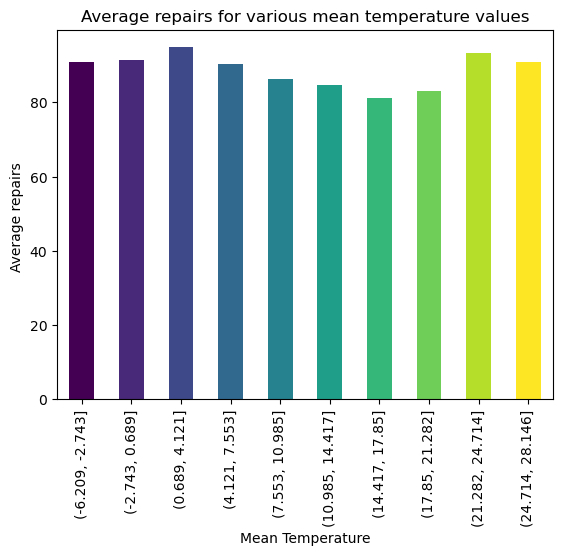

In [35]:
temp = pd.cut(job7['temperature_2m_mean (°C)'], bins=10)
job7['temperature_2m_mean (°C)_bins'] = temp
avg_temp_count_no_planned = job7.groupby('temperature_2m_mean (°C)_bins')['report_count'].mean()

num_bars = len(avg_temp_count_no_planned)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
avg_temp_count_no_planned.plot(kind='bar', color=colors)

plt.xlabel('Mean Temperature')
plt.ylabel('Average repairs ')
plt.title('Average repairs for various mean temperature values')
plt.show()

##### The analysis of data that included Planned repairs depicts a higher repair count for the last bin, however, the repair count is shown to be quite evenly distributed across various temperature bins with Planned repairs excluded

### Average repair for windgusts

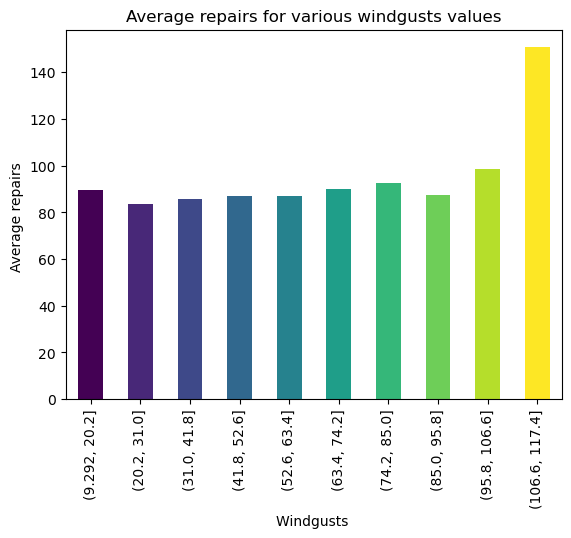

In [36]:
wind = pd.cut(job7['windgusts_10m_max (km/h)'], bins=10)
job7['windgusts_10m_max (km/h)_bins'] = wind

avg_wind_count_no_planned = job7.groupby('windgusts_10m_max (km/h)_bins')['report_count'].mean()
num_bars = len(avg_wind_count_no_planned)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
avg_wind_count_no_planned.plot(kind='bar', color=colors)

plt.xlabel('Windgusts ')
plt.ylabel('Average repairs ')
plt.title('Average repairs for various windgusts values')
plt.show()

### Average repair for radiation

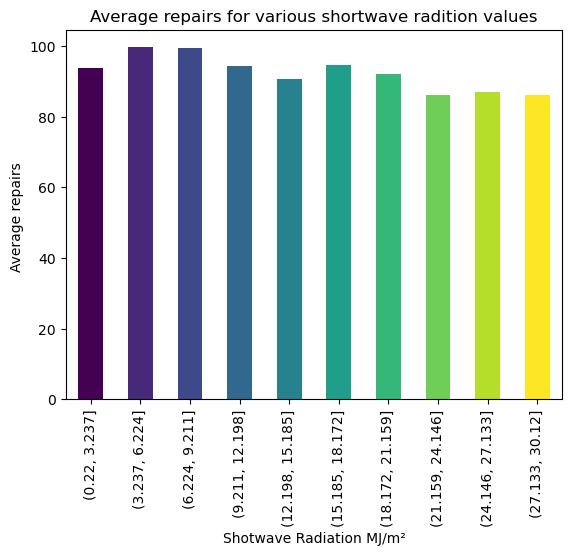

In [38]:
# binning shortwave radiation values
swr = pd.cut(job7['shortwave_radiation_sum (MJ/m²)'], bins=10)
job7['shortwave_radiation_sum (MJ/m²)_bins'] = swr

avg_swr_count_no_planned = job7.groupby('shortwave_radiation_sum (MJ/m²)_bins')['report_count'].mean()
num_bars = len(avg_swr_count_no_planned)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
avg_swr_count.plot(kind='bar', color=colors)

plt.xlabel('Shotwave Radiation MJ/m²')
plt.ylabel('Average repairs ')
plt.title('Average repairs for various shortwave radition values')
plt.show()

##### Apart from the change in the average repair count distribution for binned 'temperature', excluding Planned repairs from our dataset does not affect our analysis. It does increase the average repair count per bin for various weather features but causes no overall change in the distribution. 